In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d pradheeprio/handwritten-digit-classification

100% 19.0M/19.0M [00:00<00:00, 100MB/s] 
100% 19.0M/19.0M [00:00<00:00, 95.0MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/handwritten-digit-classification.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [32]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [33]:
dir='/content/database'

In [34]:
img_height=256
img_width=256
batch_size=32

In [35]:
train_dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)
train_data=train_dataGen.flow_from_directory(
    dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

Found 24010 images belonging to 10 classes.


In [36]:
valid_data=train_dataGen.flow_from_directory(
    dir,
    target_size=(img_height,img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

Found 6000 images belonging to 10 classes.


In [37]:
model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D((2,2)),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),

    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')

])

In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
history=model.fit(train_data,
                  steps_per_epoch=train_data.samples//batch_size,
                  validation_data=valid_data,
                  validation_steps=valid_data.samples//batch_size,
                  epochs=5)

Epoch 1/5
750/750 [==============================] - 62s 80ms/step - loss: 0.2660 - accuracy: 0.9166 - val_loss: 0.0639 - val_accuracy: 0.9836
Epoch 2/5
750/750 [==============================] - 60s 80ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0595 - val_accuracy: 0.9841
Epoch 3/5
750/750 [==============================] - 57s 76ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0602 - val_accuracy: 0.9848
Epoch 4/5
750/750 [==============================] - 60s 80ms/step - loss: 0.0168 - accuracy: 0.9947 - val_loss: 0.1243 - val_accuracy: 0.9779
Epoch 5/5
750/750 [==============================] - 81s 107ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0794 - val_accuracy: 0.9838


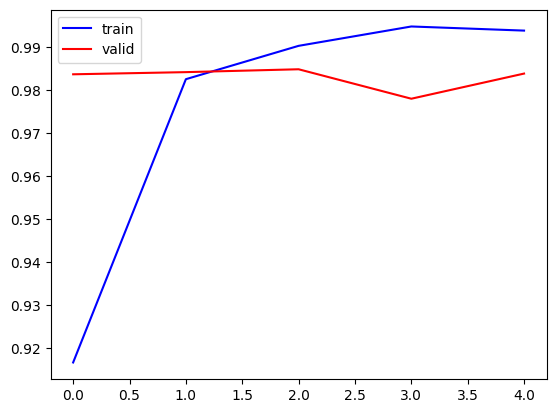

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='blue',label='train')
plt.plot(history.history['val_accuracy'],color='red',label='valid')
plt.legend()
plt.show()

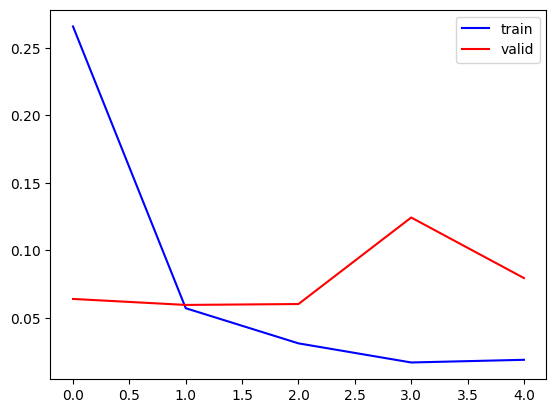

In [41]:
plt.plot(history.history['loss'],color='blue',label='train')
plt.plot(history.history['val_loss'],color='red',label='valid')
plt.legend()
plt.show()

In [42]:
import cv2

In [81]:
test=cv2.imread('/content/database/5/train_35_00002.png')

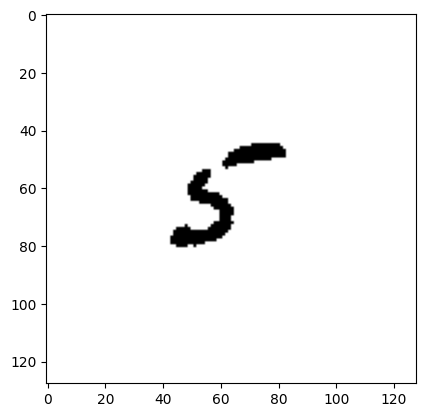

In [82]:
plt.imshow(test)

In [83]:
test_image=cv2.resize(test,(256,256))

In [84]:
test_image=test_image.reshape(1,256,256,3)

In [85]:
import numpy as np

predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)

predicted_class


1/1 [==============================] - 0s 26ms/step


5